In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv', index_col=0)
test = pd.read_csv('data/test.csv', index_col=0)

In [3]:
train.shape, test.shape

((1235, 28), (824, 27))

In [4]:
train.sample(5)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
866,no,adult,529642,39.3,88.0,24.0,cool,reduced,bright_red,more_3_sec,...,52.0,8.1,serosanguious,2.6,yes,3124,0,0,no,euthanized
876,yes,adult,528548,38.2,66.0,24.0,cool,reduced,pale_cyanotic,less_3_sec,...,44.0,7.2,cloudy,3.6,yes,2209,0,0,yes,died
943,yes,adult,528523,38.0,44.0,9.0,cool,normal,normal_pink,less_3_sec,...,35.0,6.7,NaN,3.6,yes,2208,0,0,yes,lived
373,no,adult,528729,38.1,48.0,24.0,normal,normal,pale_pink,less_3_sec,...,49.0,8.5,clear,1.3,no,0,0,0,yes,lived
1190,no,adult,529461,38.6,54.0,36.0,cool,reduced,normal_pink,less_3_sec,...,57.0,8.2,serosanguious,7.4,no,7400,0,0,yes,euthanized


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1196 non-null   object 
 7   peripheral_pulse       1175 non-null   object 
 8   mucous_membrane        1214 non-null   object 
 9   capillary_refill_time  1229 non-null   object 
 10  pain                   1191 non-null   object 
 11  peristalsis            1215 non-null   object 
 12  abdominal_distention   1212 non-null   object 
 13  nasogastric_tube       1155 non-null   object 
 14  nasogastric_reflux     1214 non-null   object 
 15  nasogastr

In [6]:
train["abdomen"].value_counts()

abdomen
distend_small    482
distend_large    359
normal            76
firm              72
other             33
Name: count, dtype: int64

In [7]:
numerical_features = train[['outcome', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']].copy()

<Axes: ylabel='count'>

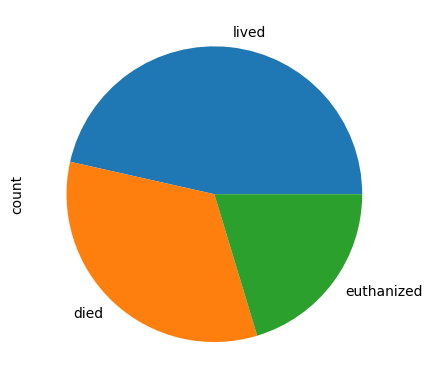

In [8]:
train["outcome"].value_counts().plot(kind="pie")

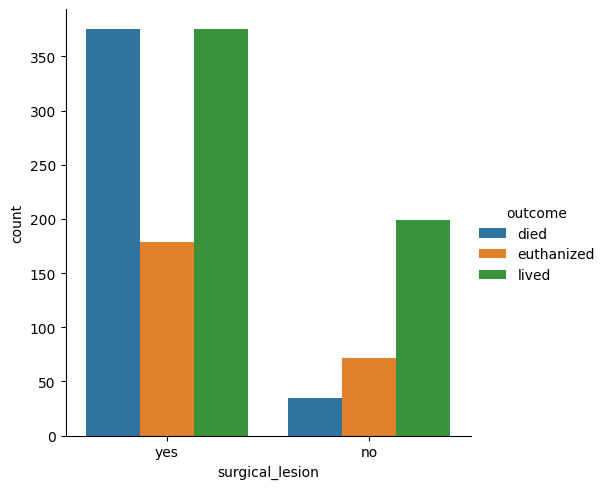

In [9]:
sns.catplot(data=train, x="surgical_lesion", hue="outcome", kind="count")

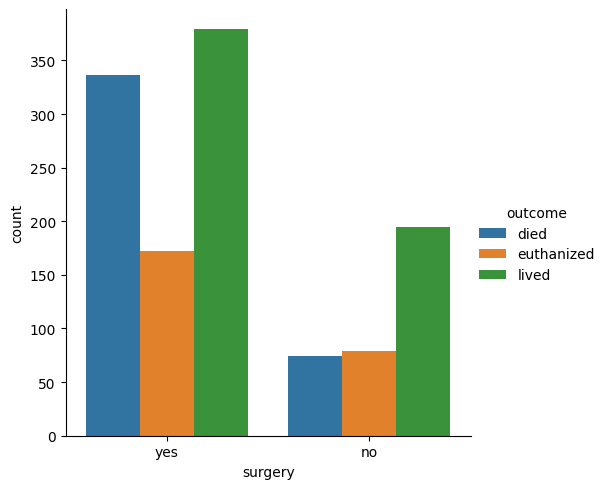

In [10]:
sns.catplot(data=train, x="surgery", hue="outcome", kind="count")

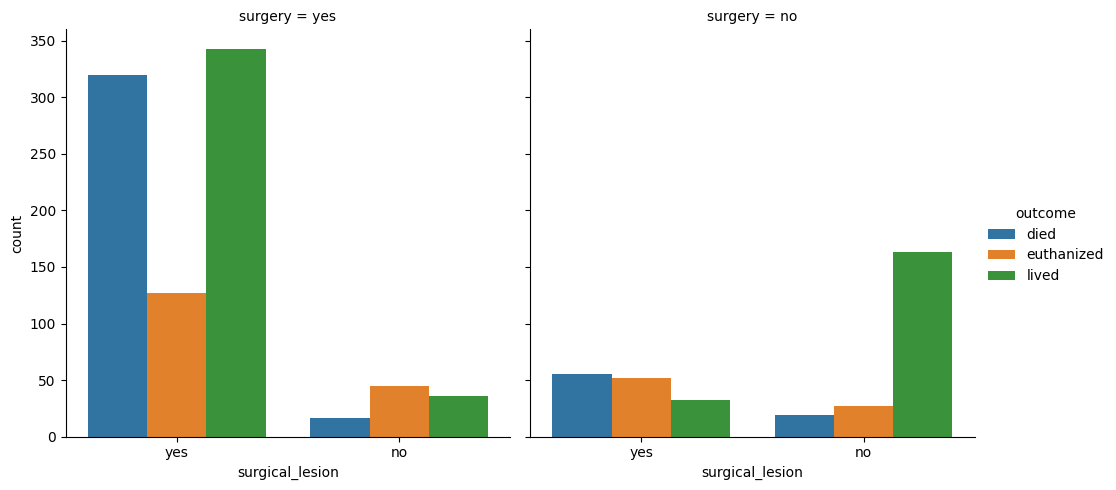

In [11]:
sns.catplot(data=train, col="surgery", x="surgical_lesion",hue="outcome", kind="count")

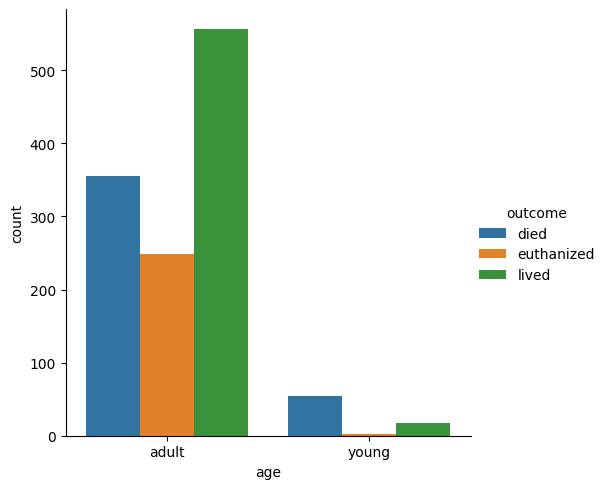

In [12]:
sns.catplot(data=train, x="age", hue="outcome", kind="count")

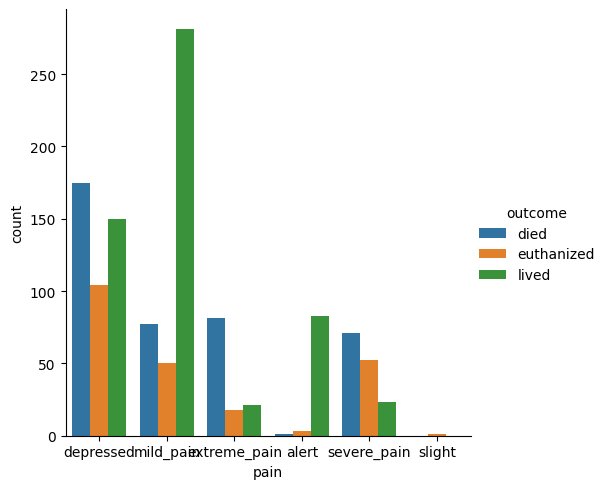

In [13]:
sns.catplot(data=train, x="pain", hue="outcome", kind="count")

In [14]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 0 to 1234
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   outcome                1235 non-null   object 
 1   hospital_number        1235 non-null   int64  
 2   rectal_temp            1235 non-null   float64
 3   pulse                  1235 non-null   float64
 4   respiratory_rate       1235 non-null   float64
 5   nasogastric_reflux_ph  1235 non-null   float64
 6   packed_cell_volume     1235 non-null   float64
 7   total_protein          1235 non-null   float64
 8   abdomo_protein         1235 non-null   float64
 9   lesion_1               1235 non-null   int64  
 10  lesion_2               1235 non-null   int64  
 11  lesion_3               1235 non-null   int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 125.4+ KB


In [15]:
outcome_to_num = {
    "lived": 0,
    "died": 1,
    "euthanized": 2
}

In [16]:
numerical_features['outcome'].value_counts()

outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64

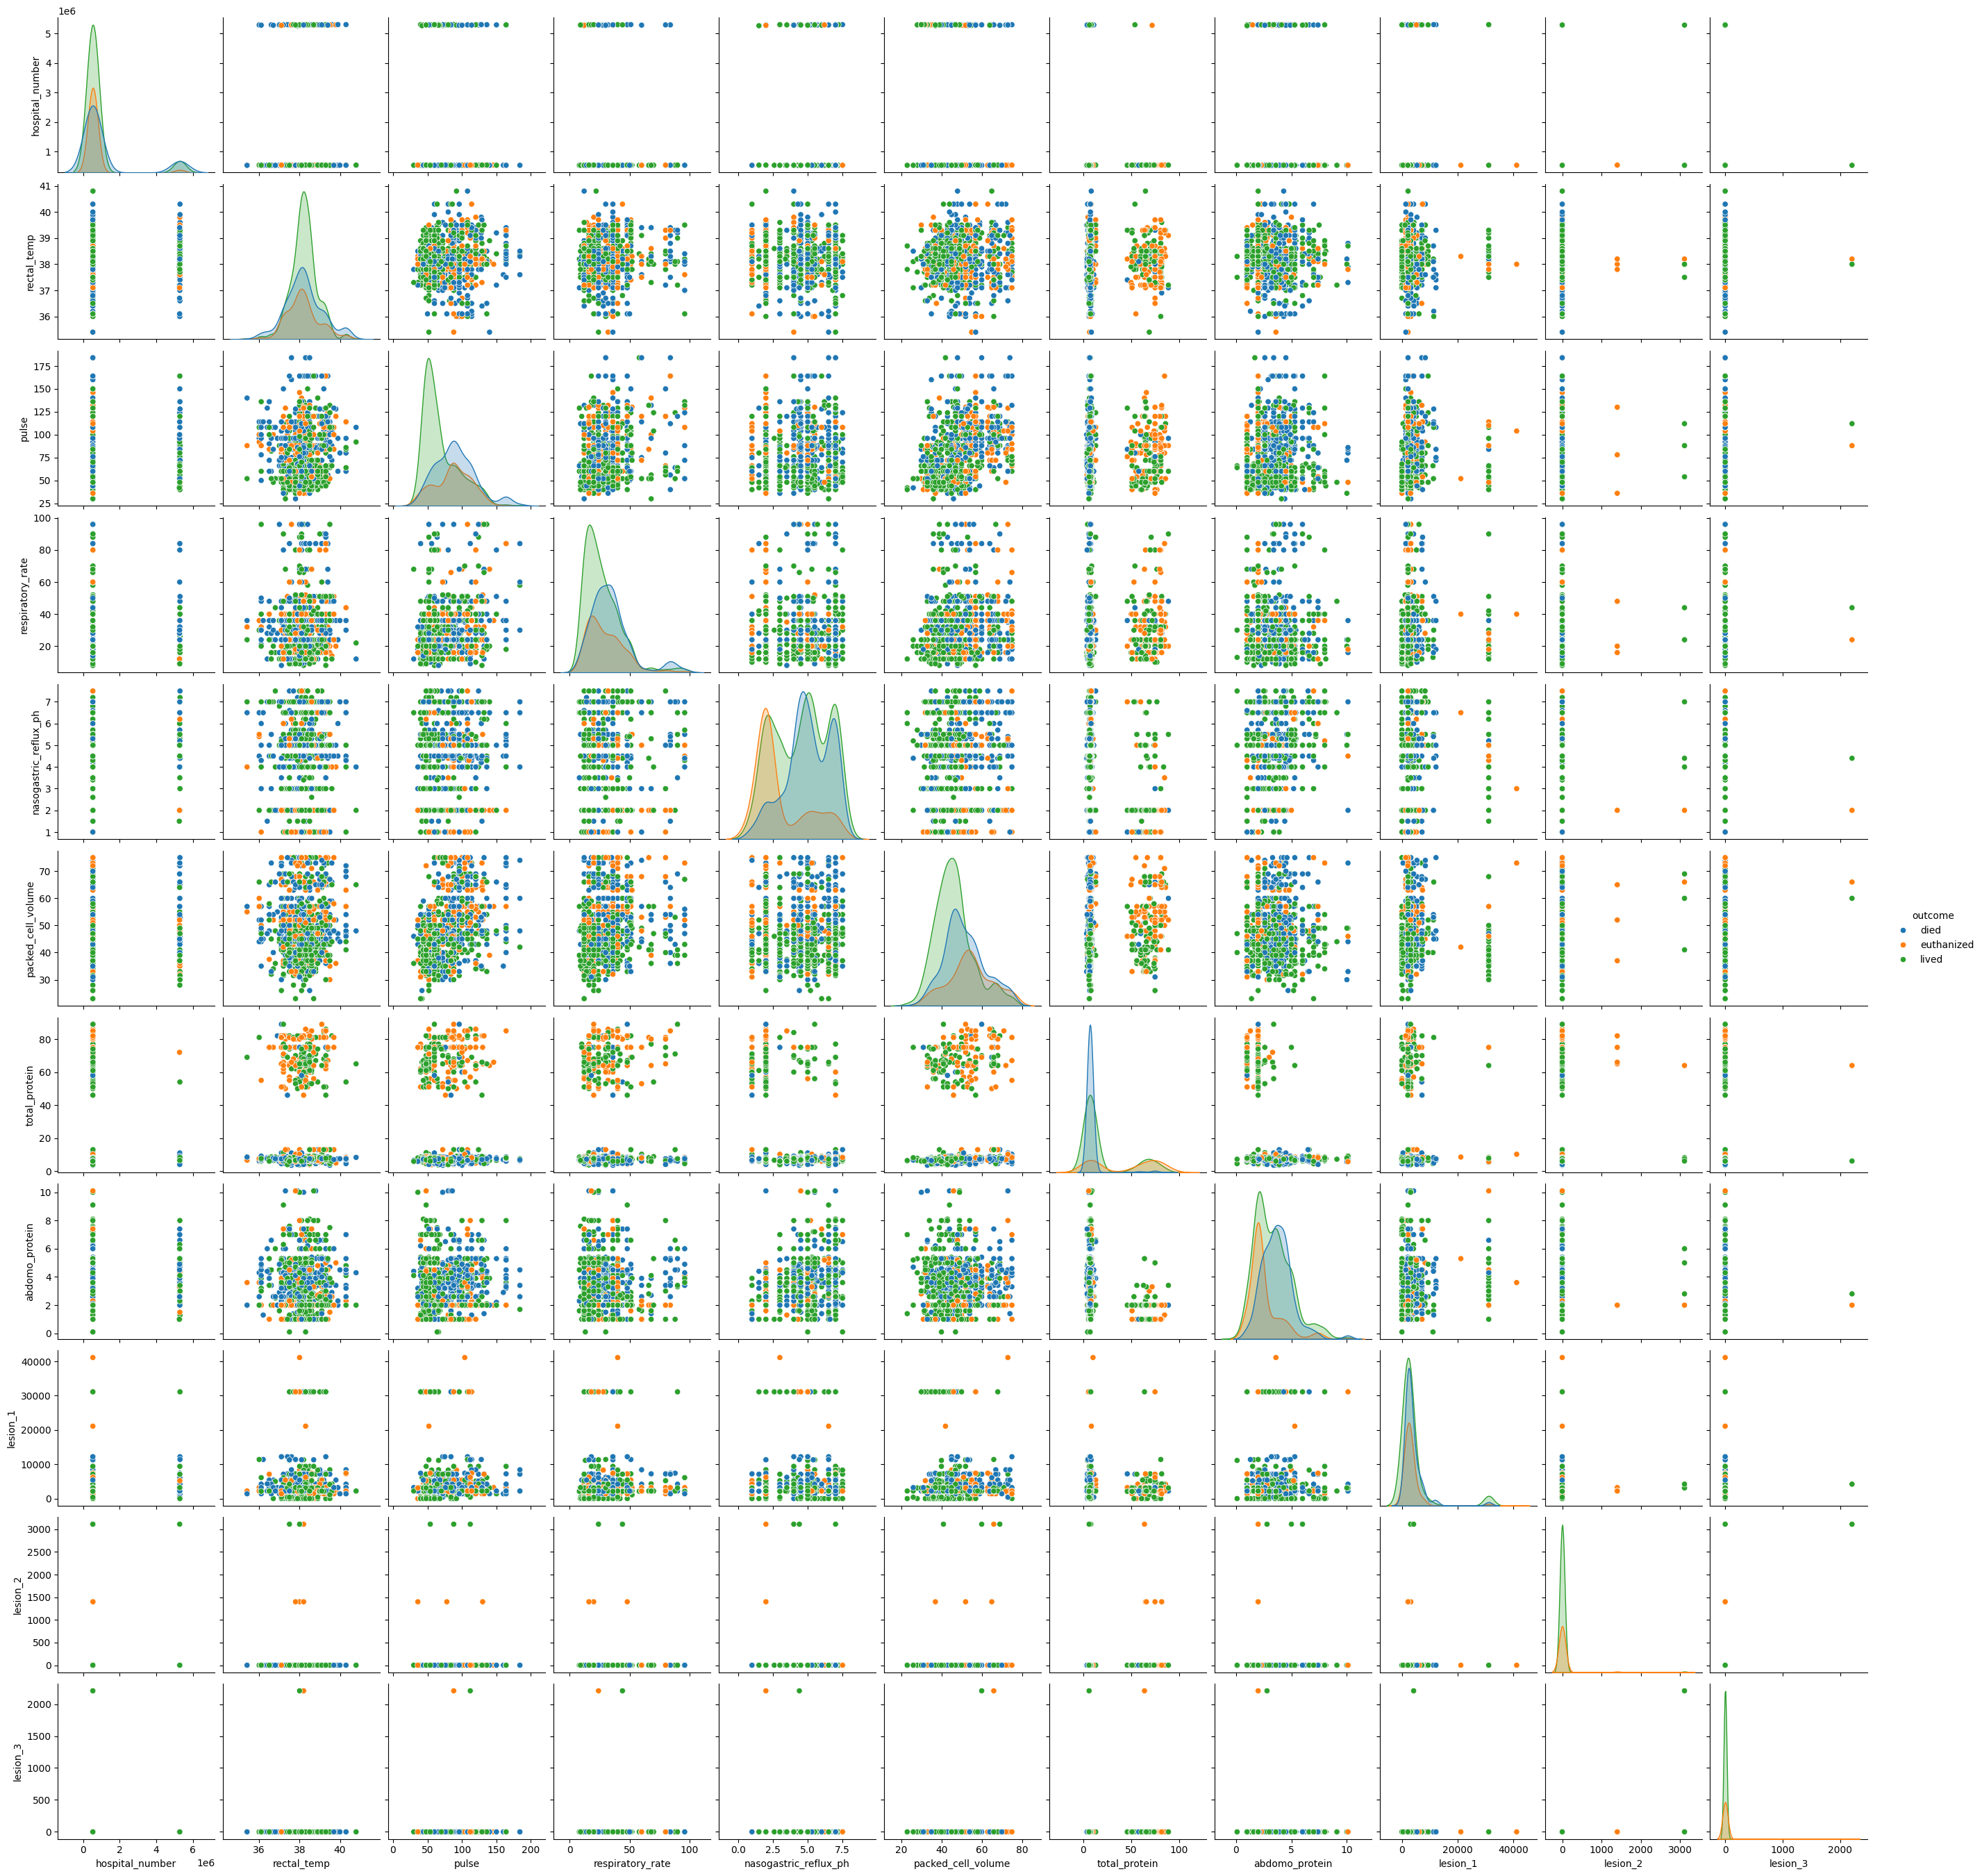

In [17]:
sns.pairplot(train, hue="outcome")

In [18]:
numerical_features['outcome'] = numerical_features['outcome'].apply(lambda x: outcome_to_num[x])

<Axes: >

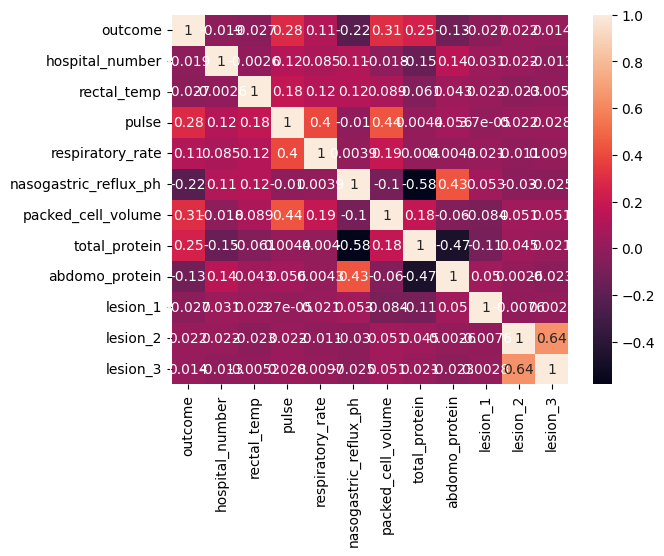

In [19]:
sns.heatmap(numerical_features.corr(), annot=True)

In [20]:
# pulse, packed_cell_volume, total_protein

<Axes: xlabel='pulse', ylabel='Count'>

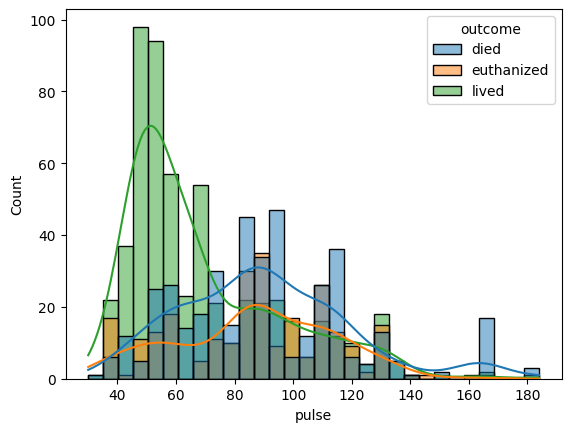

In [21]:
sns.histplot(data=train, x="pulse", hue="outcome", kde=True, bins=30)

<Axes: xlabel='packed_cell_volume', ylabel='Count'>

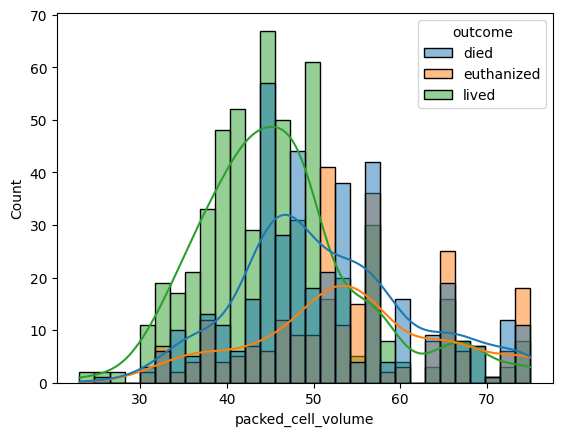

In [22]:
sns.histplot(data=train, x="packed_cell_volume", hue="outcome", kde=True, bins=30)

<Axes: xlabel='total_protein', ylabel='Count'>

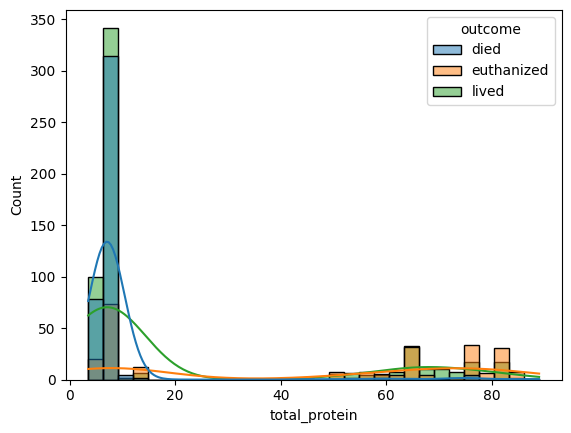

In [23]:
sns.histplot(data=train, x="total_protein", hue="outcome", kde=True, bins=30)

<Axes: xlabel='rectal_temp', ylabel='Count'>

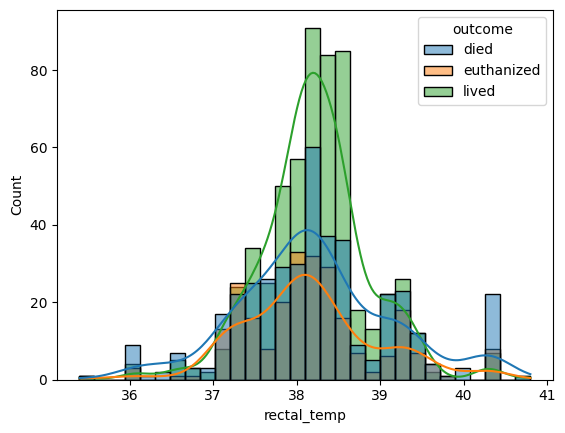

In [24]:
sns.histplot(data=train, x="rectal_temp", hue="outcome", kde=True, bins=30)

In [25]:
# Linear SVC avec une feature

In [26]:
from sklearn.svm import SVC

In [27]:
X_train = np.array(train.loc[:, "pulse"].tolist()).reshape(-1,1)
y_train = train.loc[:, "outcome"]

In [28]:
model_SVC = SVC(kernel='linear', gamma='scale', shrinking=False,)

In [29]:
model_SVC.fit(X_train, y_train)

SVC(kernel='linear', shrinking=False)

In [30]:
X_test = np.array(test.loc[:, "pulse"].tolist()).reshape(-1,1)

In [31]:
prediction = model_SVC.predict(X_test)

In [32]:
print(model_SVC.score(X_test, prediction))

1.0


In [33]:
# Linear SVC with all features

In [37]:
X_train = train.drop("outcome", axis=1)
y_train = train.iloc[:, "outcome"]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types